<a href="https://colab.research.google.com/github/EloraApple/TidyTues/blob/main/TidyTuesdayW20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pandas
import pandas as pd
#!pip install matplotlib
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns
import numpy as np

water_quality = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-05-20/water_quality.csv')
weather = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-05-20/weather.csv')



In [ ]:
water_quality.head()

,region,council,swim_site,date,time,enterococci_cfu_100ml,water_temperature_c,conductivity_ms_cm,latitude,longitude
0,Western Sydney,Hawkesbury City Council,Windsor Beach,2025-04-28,11:00:00,620.0,20.0,248.0,-33.604483,150.817039
1,Sydney Harbour,North Sydney Council,Hayes Street Beach,2025-04-28,11:40:00,64.0,21.0,45250.0,-33.841715,151.219382
2,Sydney Harbour,Willoughby City Council,Northbridge Baths,2025-04-28,10:54:00,160.0,21.0,48930.0,-33.806043,151.222754
3,Sydney Harbour,Northern Beaches Council,Fairlight Beach,2025-04-28,09:28:00,54.0,21.0,52700.0,-33.800731,151.274778
4,Western Sydney,Hawkesbury City Council,Yarramundi Reserve,2025-04-28,10:35:00,720.0,18.0,64.0,-33.609123,150.697886


In [ ]:
weather.head()

,date,max_temp_C,min_temp_C,precipitation_mm,latitude,longitude
0,1991-01-01,29.3,22.1,2.4,-33.848858,151.19551
1,1991-01-02,27.5,22.4,0.0,-33.848858,151.19551
2,1991-01-03,28.2,21.1,0.0,-33.848858,151.19551
3,1991-01-04,30.8,23.7,0.0,-33.848858,151.19551
4,1991-01-05,30.4,19.5,12.2,-33.848858,151.19551


In [ ]:
df = pd.merge(water_quality, weather, on='date', how='inner')
df.head()

,region,council,swim_site,date,time,enterococci_cfu_100ml,water_temperature_c,conductivity_ms_cm,latitude_x,longitude_x,max_temp_C,min_temp_C,precipitation_mm,latitude_y,longitude_y
0,Western Sydney,Hawkesbury City Council,Windsor Beach,2025-04-28,11:00:00,620.0,20.0,248.0,-33.604483,150.817039,20.4,14.2,1.8,-33.848858,151.19551
1,Sydney Harbour,North Sydney Council,Hayes Street Beach,2025-04-28,11:40:00,64.0,21.0,45250.0,-33.841715,151.219382,20.4,14.2,1.8,-33.848858,151.19551
2,Sydney Harbour,Willoughby City Council,Northbridge Baths,2025-04-28,10:54:00,160.0,21.0,48930.0,-33.806043,151.222754,20.4,14.2,1.8,-33.848858,151.19551
3,Sydney Harbour,Northern Beaches Council,Fairlight Beach,2025-04-28,09:28:00,54.0,21.0,52700.0,-33.800731,151.274778,20.4,14.2,1.8,-33.848858,151.19551
4,Western Sydney,Hawkesbury City Council,Yarramundi Reserve,2025-04-28,10:35:00,720.0,18.0,64.0,-33.609123,150.697886,20.4,14.2,1.8,-33.848858,151.19551


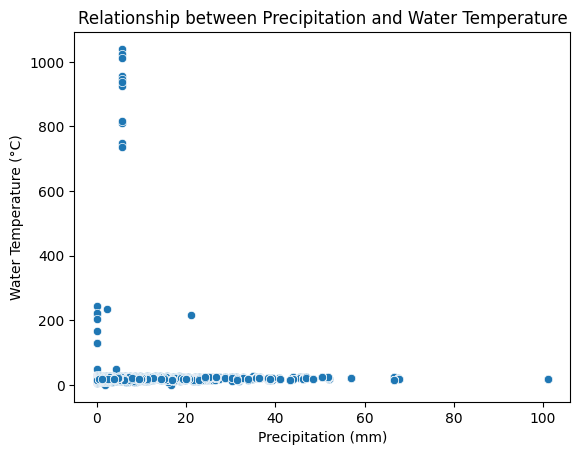

In [ ]:
sns.scatterplot(data=df, x='precipitation_mm', y='water_temperature_c')
plt.title('Relationship between Precipitation and Water Temperature')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Water Temperature (°C)')
plt.show()

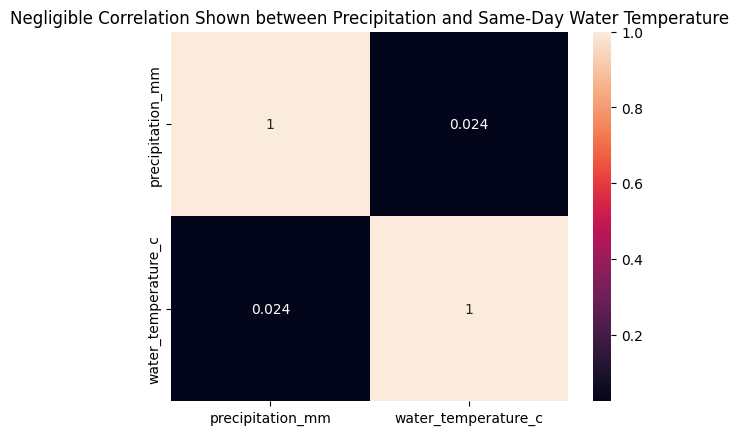

In [ ]:
df[['precipitation_mm', 'water_temperature_c']].corr()
sns.heatmap(df[['precipitation_mm', 'water_temperature_c']].corr(), annot=True)
plt.title('Negligible Correlation Shown between Precipitation and Same-Day Water Temperature')
plt.show()

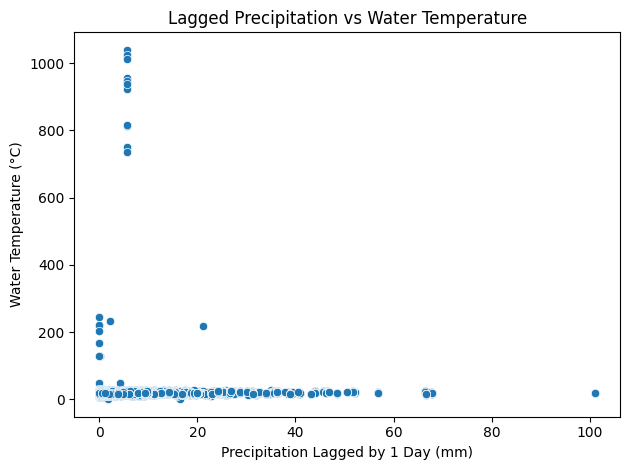

In [ ]:
# Create a lag of 1 day for precipitation
df['precipitation_mm_lag1'] = df['precipitation_mm'].shift(1)

# Scatter plot with lag
sns.scatterplot(data=df, x='precipitation_mm_lag1', y='water_temperature_c')
plt.title('Lagged Precipitation vs Water Temperature')
plt.xlabel('Precipitation Lagged by 1 Day (mm)')
plt.ylabel('Water Temperature (°C)')
plt.tight_layout()
plt.show()

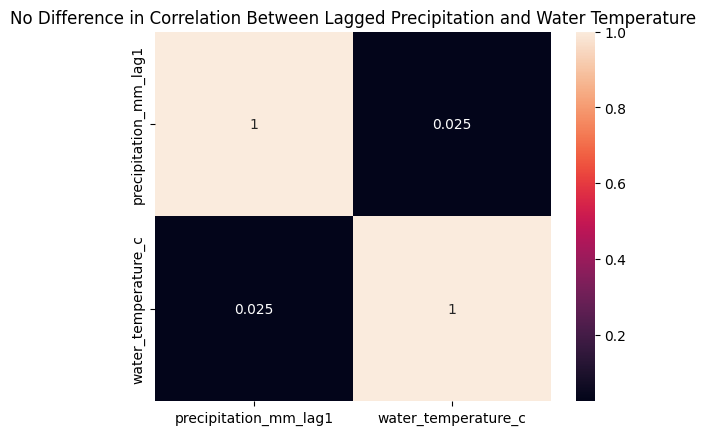

In [ ]:
df[['precipitation_mm_lag1', 'water_temperature_c']].corr()
sns.heatmap(df[['precipitation_mm_lag1', 'water_temperature_c']].corr(), annot=True)
plt.title('No Difference in Correlation Between Lagged Precipitation and Water Temperature')
plt.show()

In [ ]:
## ecoli at various sites over time
## rain amount impact ecoli
## outside temperature impact ecoli
## water temperature impact ecoli


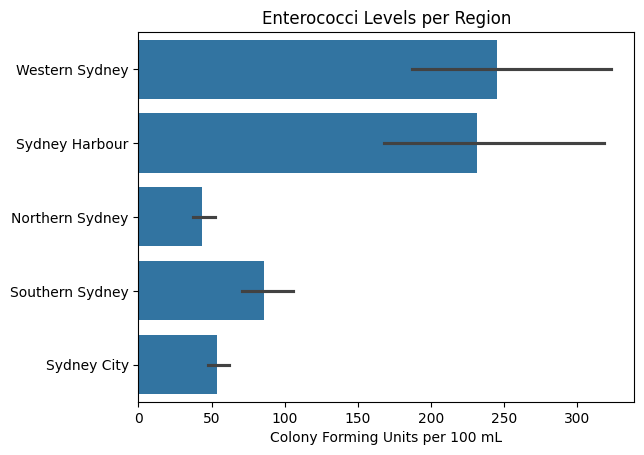

In [ ]:
sns.barplot(data=df, x='enterococci_cfu_100ml',y='region')
plt.title('Enterococci Levels per Region')
plt.ylabel('')
plt.xlabel('Colony Forming Units per 100 mL')
plt.show()

<ipython-input-12-4297ffb4067e>:1: FutureWarning: The provided callable <function median at 0x7d17aa803060> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pivot_df = df.pivot_table(index="region", columns="council", values="enterococci_cfu_100ml",aggfunc=np.median)


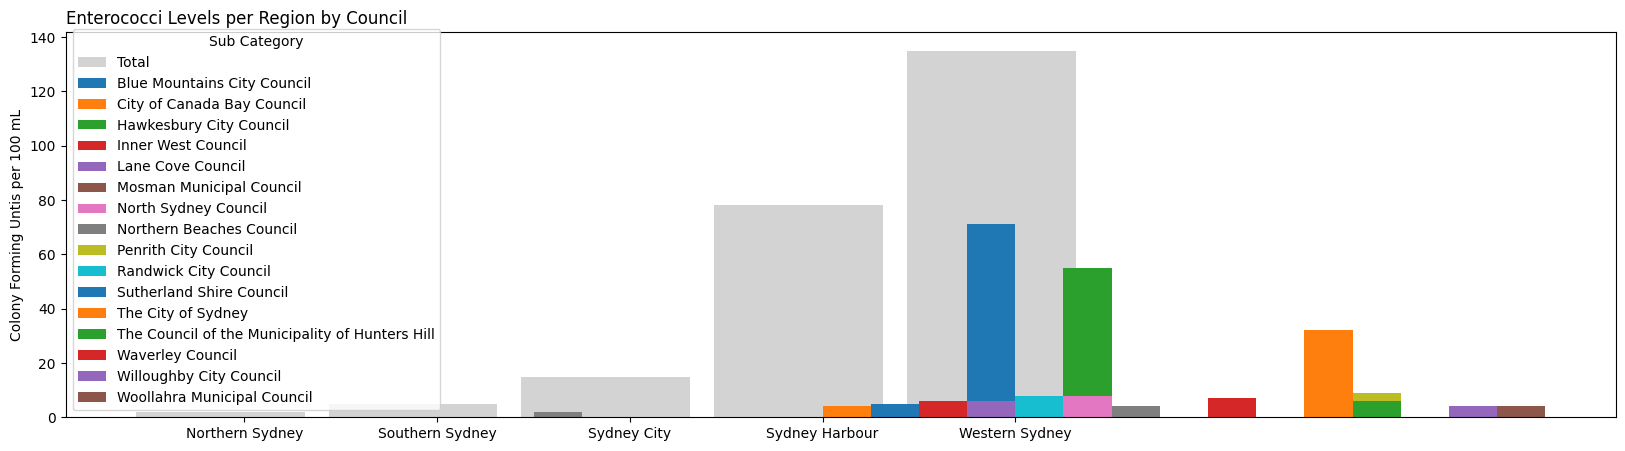

In [ ]:
pivot_df = df.pivot_table(index="region", columns="council", values="enterococci_cfu_100ml",aggfunc=np.median)
totals = pivot_df.sum(axis=1)

fig, ax = plt.subplots(figsize=(20, 5))

bar_width = 0.25
x = np.arange(len(pivot_df.index))
ax.bar(x, totals, width=bar_width * 3.5, color="lightgrey", zorder=0, label="Total")

for i, sub_cat in enumerate(pivot_df.columns):
    ax.bar(x + i * bar_width, pivot_df[sub_cat], width=bar_width, label=sub_cat)

ax.set_xlabel('')
ax.set_ylabel("Colony Forming Untis per 100 mL")
ax.set_title("Enterococci Levels per Region by Council", loc="left")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(pivot_df.index)
ax.legend(title="Sub Category")

plt.show()

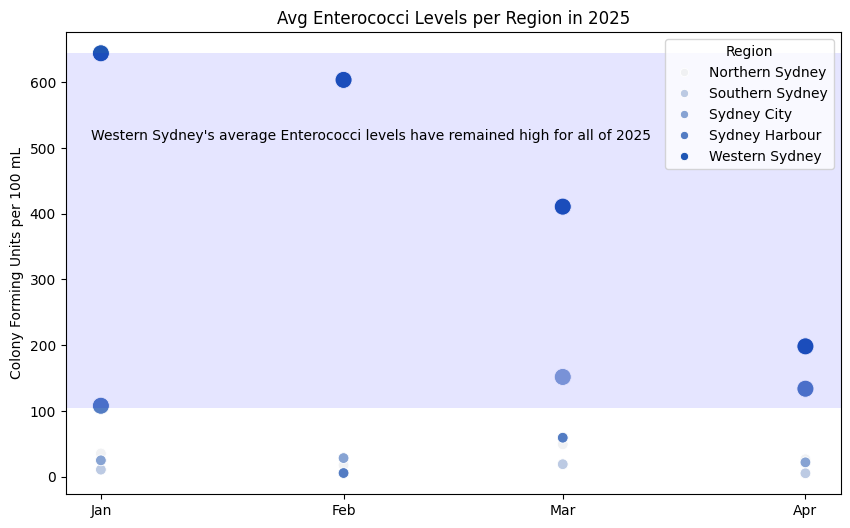

In [ ]:
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_2025 = df[df['date'].dt.year == 2025].copy()
df_2025['month'] = df_2025['date'].dt.to_period('M').dt.to_timestamp()

monthly_avg = (
    df_2025
    .groupby(['region', 'month'], as_index=False)['enterococci_cfu_100ml']
    .mean()
)

monthly_avg['size']=monthly_avg['enterococci_cfu_100ml'].apply(lambda x: 150 if x > 104 else 60)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=monthly_avg,
    x='month',
    y='enterococci_cfu_100ml',
    hue='region',
    size='size',
    sizes=(60, 150))
# Get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Filter out size-related items
filtered = [
    (h, l) for h, l in zip(handles, labels)
    if l not in ['region', 'size'] and not l.isdigit()  # remove headers and size values
]

# Rebuild the legend with only the region names
plt.legend(*zip(*filtered), title='Region')


plt.gca().set_xticks(monthly_avg['month'].unique())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.axhspan(104, monthly_avg['enterococci_cfu_100ml'].max(), facecolor='blue', alpha=0.1)



plt.title('Avg Enterococci Levels per Region in 2025')
plt.xlabel('')
plt.ylabel('Colony Forming Units per 100 mL')

plt.figtext(.43, .7, "Western Sydney's average Enterococci levels have remained high for all of 2025", ha='center')
plt.show()

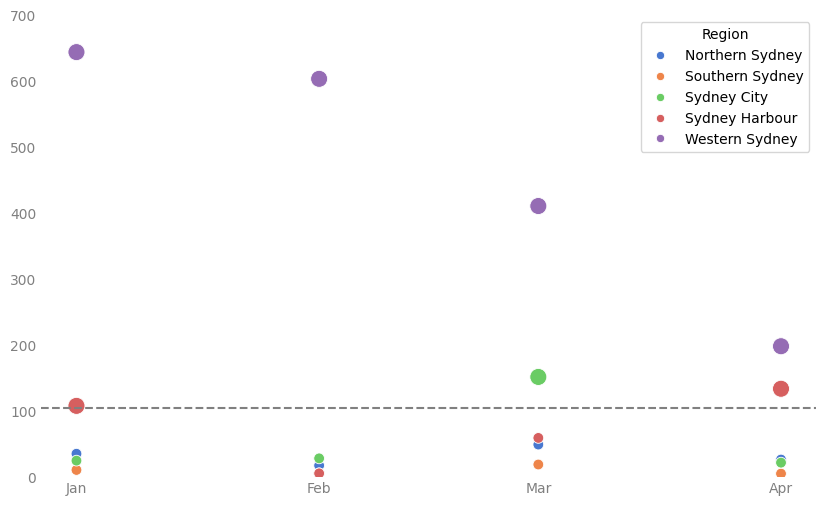

In [ ]:
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_2025 = df[df['date'].dt.year == 2025].copy()
df_2025['month'] = df_2025['date'].dt.to_period('M').dt.to_timestamp()

monthly_avg = (
    df_2025
    .groupby(['region', 'month'], as_index=False)['enterococci_cfu_100ml']
    .mean()
)

monthly_avg['size']=monthly_avg['enterococci_cfu_100ml'].apply(lambda x: 150 if x > 104 else 60)


palette = sns.color_palette("muted", n_colors=5)
sns.set_palette(palette)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=monthly_avg,
    x='month',
    y='enterococci_cfu_100ml',
    hue='region',
    size='size',
    sizes=(60, 150))
# Get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Filter out size-related items
filtered = [
    (h, l) for h, l in zip(handles, labels)
    if l not in ['region', 'size'] and not l.isdigit()  # remove headers and size values
]

# Rebuild the legend with only the region names
plt.legend(*zip(*filtered), title='Region')


plt.gca().set_xticks(monthly_avg['month'].unique())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.axhline(104, color='grey', linestyle='--', label='Safe Limit: 104 CFU/100 mL')


plt.title('')
plt.xlabel('')
for label in ax.get_xticklabels():
    label.set_fontname('Roboto')
plt.ylabel('')
for label in ax.get_yticklabels():
    label.set_fontname('Roboto')
plt.tick_params(axis='x', length=0, colors='grey')
plt.tick_params(axis='y', length=0, colors='grey')
sns.despine(left=True,bottom=True)
plt.ylim(0, 700)
plt.show()

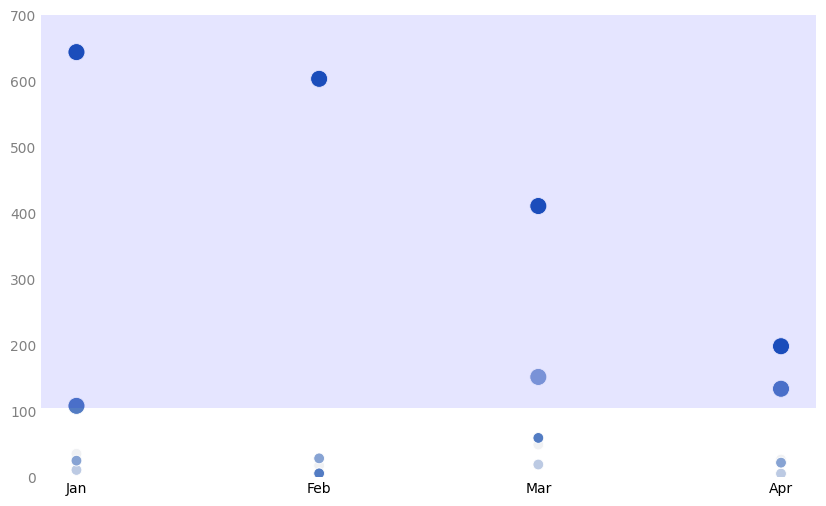

In [ ]:
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_2025 = df[df['date'].dt.year == 2025].copy()
df_2025['month'] = df_2025['date'].dt.to_period('M').dt.to_timestamp()

monthly_avg = (
    df_2025
    .groupby(['region', 'month'], as_index=False)['enterococci_cfu_100ml']
    .mean()
)

monthly_avg['size']=monthly_avg['enterococci_cfu_100ml'].apply(lambda x: 150 if x > 104 else 60)


palette = sns.color_palette("light:#1f56b4", n_colors=5)
sns.set_palette(palette)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=monthly_avg,
    x='month',
    y='enterococci_cfu_100ml',
    hue='region',
    size='size',
    sizes=(60, 150), legend=None)



plt.gca().set_xticks(monthly_avg['month'].unique())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.axhspan(104, 700, facecolor='blue', alpha=0.1)



plt.title('')
plt.xlabel('')
for label in ax.get_ticklabels():
    label.set_fontname('Roboto')
plt.ylabel('')
for label in ax.get_yticklabels():
    label.set_fontname('Roboto')
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0, colors='grey')
sns.despine(left=True, bottom=True)
plt.ylim(0, 700)
plt.show()

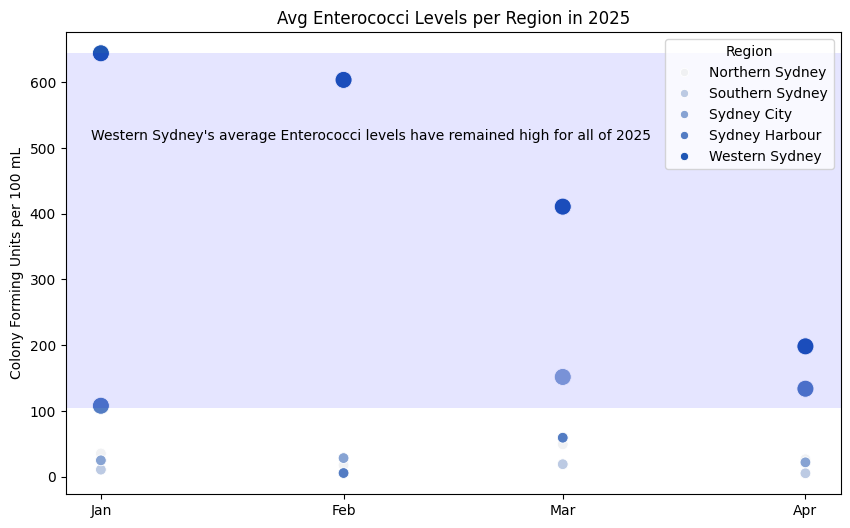

In [ ]:
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_2025 = df[df['date'].dt.year == 2025].copy()
df_2025['month'] = df_2025['date'].dt.to_period('M').dt.to_timestamp()

monthly_avg = (
    df_2025
    .groupby(['region', 'month'], as_index=False)['enterococci_cfu_100ml']
    .mean()
)

monthly_avg['size']=monthly_avg['enterococci_cfu_100ml'].apply(lambda x: 150 if x > 104 else 60)



plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=monthly_avg,
    x='month',
    y='enterococci_cfu_100ml',
    hue='region',
    size='size',
    sizes=(60, 150))
# Get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Filter out size-related items
filtered = [
    (h, l) for h, l in zip(handles, labels)
    if l not in ['region', 'size'] and not l.isdigit()  # remove headers and size values
]

# Rebuild the legend with only the region names
plt.legend(*zip(*filtered), title='Region')


plt.gca().set_xticks(monthly_avg['month'].unique())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.axhspan(104, monthly_avg['enterococci_cfu_100ml'].max(), facecolor='blue', alpha=0.1)



plt.title('Avg Enterococci Levels per Region in 2025')
plt.xlabel('')
plt.ylabel('Colony Forming Units per 100 mL')

plt.figtext(.43, .7, "Western Sydney's average Enterococci levels have remained high for all of 2025", ha='center')
plt.show()